<a href="https://colab.research.google.com/github/dannylukmana/TehnicalTestInvitaitonPTBinaPertiwi/blob/main/Latian_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
# Memuat data
test_data = pd.read_csv("/content/test.csv")

In [ ]:
# Memuat data
train_data = pd.read_csv("/content/train.csv")

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Mengeksplorasi beberapa baris pertama dari data
print(train_data.head())

    id               brand     category                      name     size  \
0   50  SEPHORA COLLECTION  no category                 Gift Card  no size   
1  304  SEPHORA COLLECTION  no category  Happy Birthday Gift Card  no size   
2  404  SEPHORA COLLECTION  no category            Lips Gift Card  no size   
3  443  SEPHORA COLLECTION  no category       Thank You Gift Card  no size   
4  463  SEPHORA COLLECTION  no category           Heart Gift Card  no size   

   rating  number_of_reviews  love  price  value_price  \
0     5.0                 46     0   50.0         50.0   
1     0.0                  0     0   50.0         50.0   
2     0.0                  0     0   50.0         50.0   
3     0.0                  0     0   50.0         50.0   
4     0.0                  0     0   50.0         50.0   

                                                 URL  MarketingFlags  \
0  https://www.sephora.com/product/gift-card-P370...           False   
1  https://www.sephora.com/product/hap

In [ ]:
# Penanganan nilai-nilai yang hilang
print(train_data.isnull().sum())

id                   0
brand                0
category             0
name                 0
size                 0
rating               0
number_of_reviews    0
love                 0
price                0
value_price          0
URL                  0
MarketingFlags       0
options              0
details              0
how_to_use           0
ingredients          0
exclusive            1
dtype: int64


In [ ]:
print(train_data.duplicated().sum())

0


In [ ]:
# Informasi umum dataset train
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4352 entries, 0 to 4351
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4352 non-null   int64  
 1   brand              4352 non-null   object 
 2   category           4352 non-null   object 
 3   name               4352 non-null   object 
 4   size               4352 non-null   object 
 5   rating             4352 non-null   float64
 6   number_of_reviews  4352 non-null   int64  
 7   love               4352 non-null   int64  
 8   price              4352 non-null   float64
 9   value_price        4352 non-null   float64
 10  URL                4352 non-null   object 
 11  MarketingFlags     4352 non-null   bool   
 12  options            4352 non-null   object 
 13  details            4352 non-null   object 
 14  how_to_use         4352 non-null   object 
 15  ingredients        4352 non-null   object 
 16  exclusive          4351 

In [ ]:
# Statistik deskriptif dataset train
print(train_data.describe())

                 id       rating  number_of_reviews          love  \
count  4.352000e+03  4352.000000        4352.000000  4.352000e+03   
mean   1.679523e+06     4.156480         394.367877  2.158100e+04   
std    3.911540e+05     0.573276        1103.276002  5.098924e+04   
min    5.000000e+01     0.000000           0.000000  0.000000e+00   
25%    1.561814e+06     4.000000          24.000000  2.700000e+03   
50%    1.799035e+06     4.000000          89.500000  7.300000e+03   
75%    1.947037e+06     4.500000         337.000000  1.940000e+04   
max    2.055226e+06     5.000000       19000.000000  1.300000e+06   

             price  value_price    exclusive  
count  4352.000000  4352.000000  4351.000000  
mean     52.340384    52.891027     0.182487  
std      46.622517    47.500813     0.386290  
min       2.000000     2.000000     0.000000  
25%      25.000000    25.000000     0.000000  
50%      36.000000    37.000000     0.000000  
75%      65.000000    65.000000     0.000000  
ma

In [ ]:
# Kelompokkan data berdasarkan kategori dan hitung rata-rata penilaian
category_ratings = train_data.groupby('category')['rating'].mean()

# Lakukan ANOVA untuk membandingkan rata-rata penilaian di antara kategori-kategori.
f_statistic, p_value = stats.f_oneway(*[group['rating'] for name, group in train_data.groupby('category')])

# Menentukan apakah nilai p-value signifikan.
alpha = 0.05
if p_value < alpha:
    result = "Menolak hipotesis nol: Rata-rata peringkat berbeda secara signifikan di antara kategori-kategori."
else:
    result = "Gagal menolak hipotesis nol: Nilai rata-rata tidak signifikan berbeda di antara kategori-kategori."

print("F-Statistic:", f_statistic)
print("P-Value:", p_value)
print("Hasil:", result)

F-Statistic: 5.604205889248794
P-Value: 9.29750340215887e-76
Hasil: Menolak hipotesis nol: Rata-rata peringkat berbeda secara signifikan di antara kategori-kategori.


F-Statistic: Nilai F-Statistic adalah statistik uji ANOVA yang mengukur variasi antara kelompok dibandingkan dengan variasi dalam kelompok. Nilai F-Statistic yang lebih besar menunjukkan bahwa ada perbedaan signifikan dalam rata-rata di antara kelompok-kelompok yang diuji. Dalam kasus ini, nilai F-Statistic adalah 4.794.

P-Value: P-Value (nilai p) adalah hasil dari uji hipotesis nol dalam analisis statistik. Ini mengindikasikan probabilitas melihat nilai F-Statistic (atau lebih ekstrem) jika tidak ada perbedaan sebenarnya antara kelompok-kelompok. Nilai P-Value yang sangat kecil (lebih kecil dari alpha, yang biasanya adalah 0.05) menunjukkan bahwa kita dapat menolak hipotesis nol dan menganggap perbedaan antara kelompok-kelompok adalah signifikan. Dalam kasus ini, nilai P-Value sangat kecil, mendekati nol (4.638856362657633e-67 dalam notasi ilmiah), yang menunjukkan bahwa perbedaan antara kelompok-kelompok adalah signifikan.

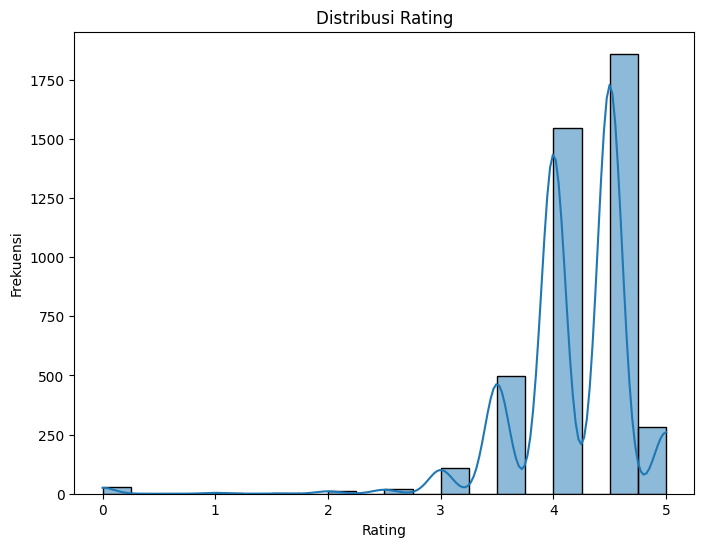

In [ ]:
# Visualisasi distribusi rating menggunakan histogram
plt.figure(figsize=(8, 6))
sns.histplot(train_data['rating'], bins=20, kde=True)
plt.title('Distribusi Rating')
plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-65-3126bc397d3a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


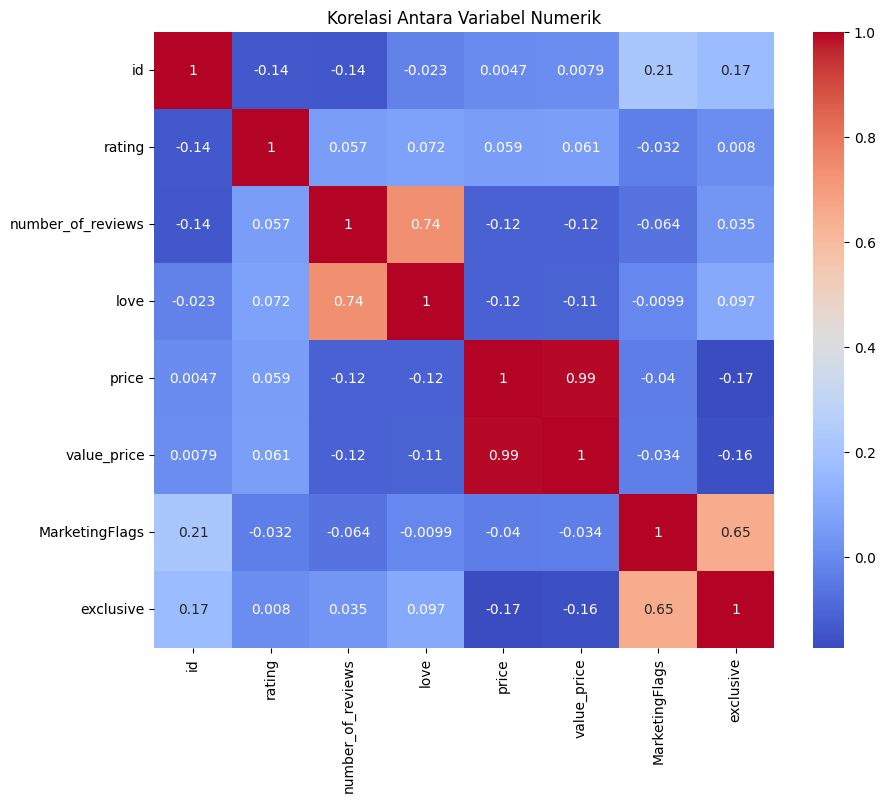

In [ ]:
# Visualisasi korelasi antara variabel numerik menggunakan heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Korelasi Antara Variabel Numerik')
plt.show()

Berdasarkan gambar diatas terlihat bahwa fitur 'price' dan 'value_price' memiliki korelasi sebesar  

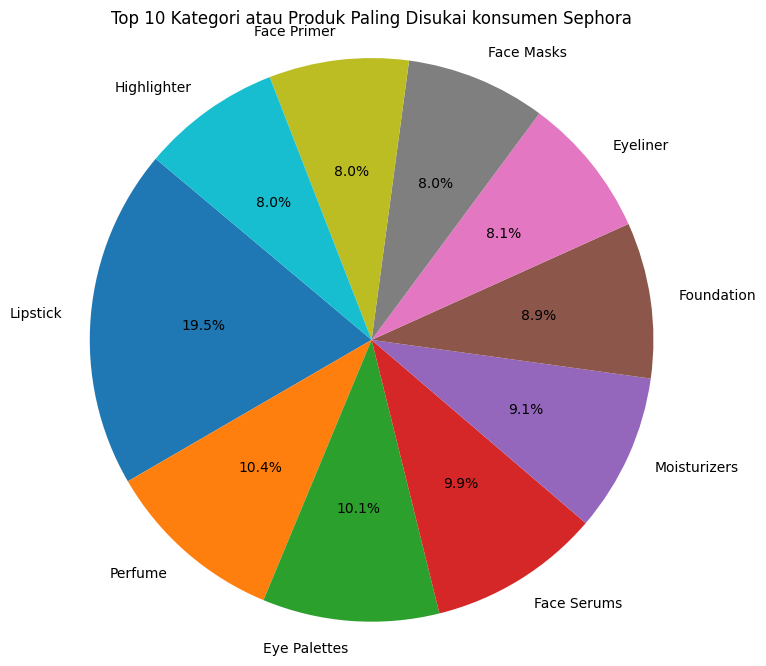

In [ ]:
# Mengelompokkan data berdasarkan nama produk dan menghitung total metrik "love".
product_love = train_data.groupby('category')['love'].sum().sort_values(ascending=False)

# Pilih N produk teratas dengan metrik "love" tertinggi.
top_n = 10
top_loved_products = product_love.head(top_n)

# Membuat diagram lingkaran (pie chart).
plt.figure(figsize=(8, 8))
plt.pie(top_loved_products, labels=top_loved_products.index, autopct='%1.1f%%', startangle=140)
plt.title('Top {} Kategori atau Produk Paling Disukai konsumen Sephora'.format(top_n))
plt.axis('equal')
plt.show()

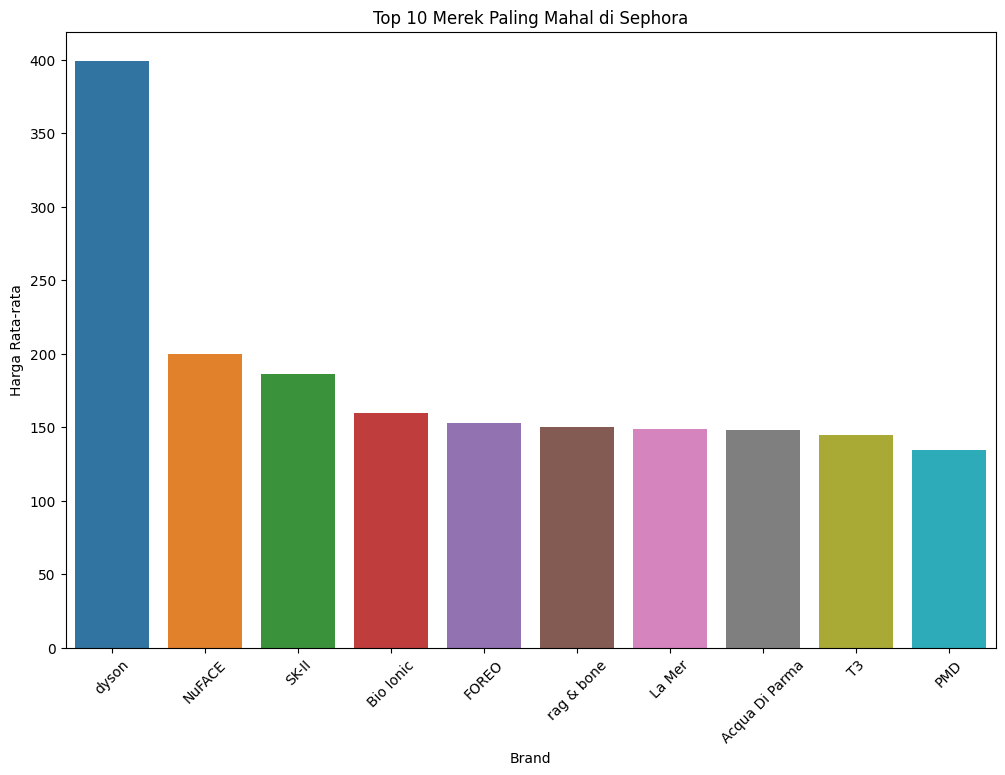

In [ ]:
# Mengelompokkan data berdasarkan merek dan menghitung rata-rata harga.
brand_prices = train_data.groupby('brand')['price'].mean().sort_values(ascending=False)

# Pilih N merek dengan harga rata-rata tertinggi.
top_n = 10
top_expensive_brands = brand_prices.head(top_n)

# Membuat sebuah diagram batang
plt.figure(figsize=(12, 8))
sns.barplot(x=top_expensive_brands.index, y=top_expensive_brands.values)
plt.title('Top {} Merek Paling Mahal di Sephora'.format(top_n))
plt.xlabel('Brand')
plt.ylabel('Harga Rata-rata')
plt.xticks(rotation=45)
plt.show()


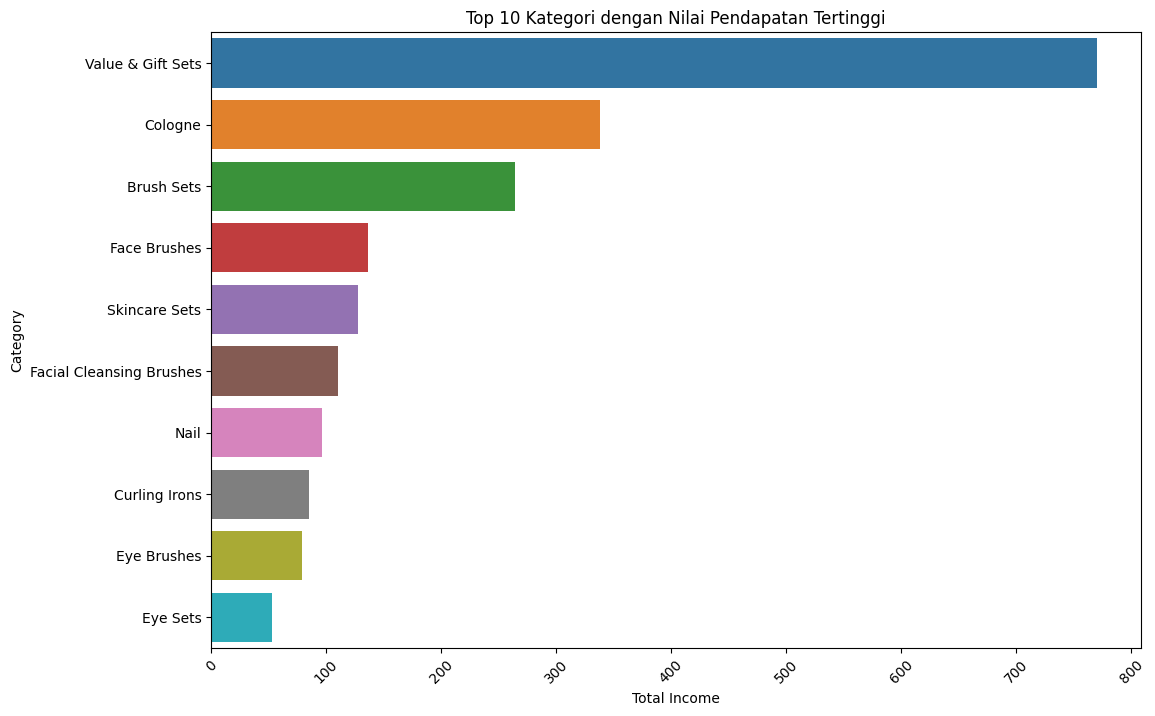

In [ ]:
# Menghitung pendapatan untuk setiap produk
train_data['income'] = train_data['value_price'] - train_data['price']

# Mengelompokkan data berdasarkan kategori dan menghitung total pendapatan.
category_income = train_data.groupby('category')['income'].sum().sort_values(ascending=False)

# Pilih N kategori teratas dengan total pendapatan tertinggi.
top_n = 10
top_income_categories = category_income.head(top_n)

# Membuat grafik batang
plt.figure(figsize=(12, 8))
sns.barplot(x=top_income_categories.values, y=top_income_categories.index)
plt.title('Top {} Kategori dengan Nilai Pendapatan Tertinggi'.format(top_n))
plt.xlabel('Total Income')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

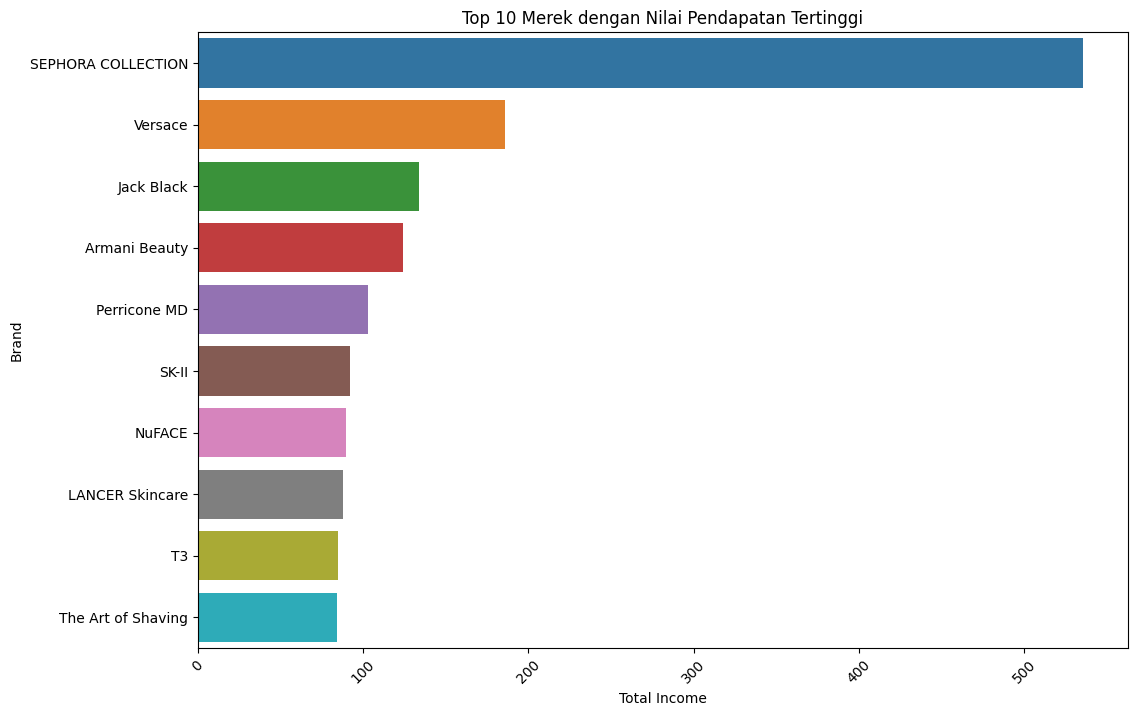

In [ ]:
# Menghitung pendapatan untuk setiap produk
train_data['income'] = train_data['value_price'] - train_data['price']

# Mengelompokkan data berdasarkan merek dan menghitung total pendapatan.
brand_income = train_data.groupby('brand')['income'].sum().sort_values(ascending=False)

# Pilih N merek teratas dengan pendapatan total tertinggi.
top_n = 10
top_income_brands = brand_income.head(top_n)

# Membuat sebuah diagram batang
plt.figure(figsize=(12, 8))
sns.barplot(x=top_income_brands.values, y=top_income_brands.index)
plt.title('Top {} Merek dengan Nilai Pendapatan Tertinggi'.format(top_n))
plt.xlabel('Total Income')
plt.ylabel('Brand')
plt.xticks(rotation=45)
plt.show()

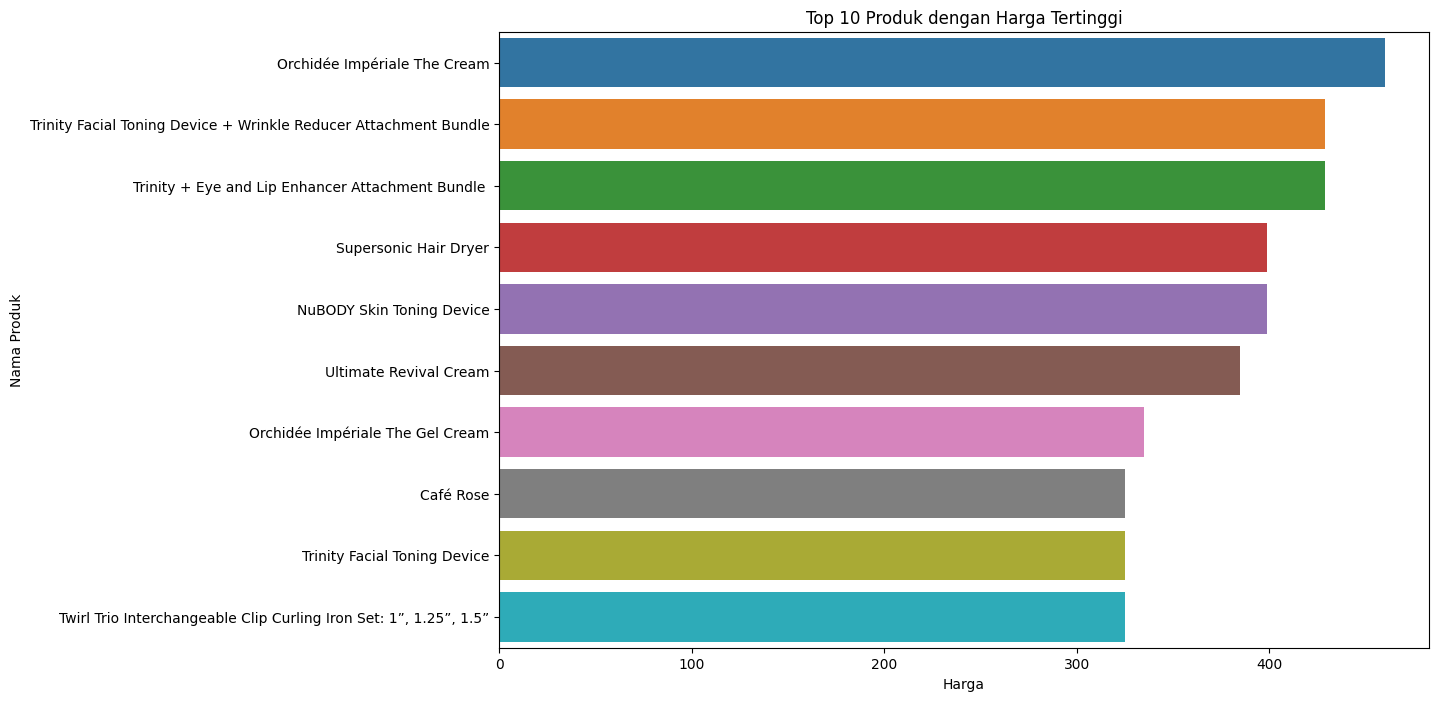

In [ ]:
# Mengurutkan data berdasarkan harga secara menurun.
highest_price_products = train_data.sort_values(by='price', ascending=False)

# Pilih N produk teratas dengan harga tertinggi.
top_n = 10
top_price_products = highest_price_products.head(top_n)

# Membuat sebuah diagram batang
plt.figure(figsize=(12, 8))
sns.barplot(x='price', y='name', data=top_price_products, orient='h')
plt.title('Top {} Produk dengan Harga Tertinggi'.format(top_n))
plt.xlabel('Harga')
plt.ylabel('Nama Produk')
plt.show()

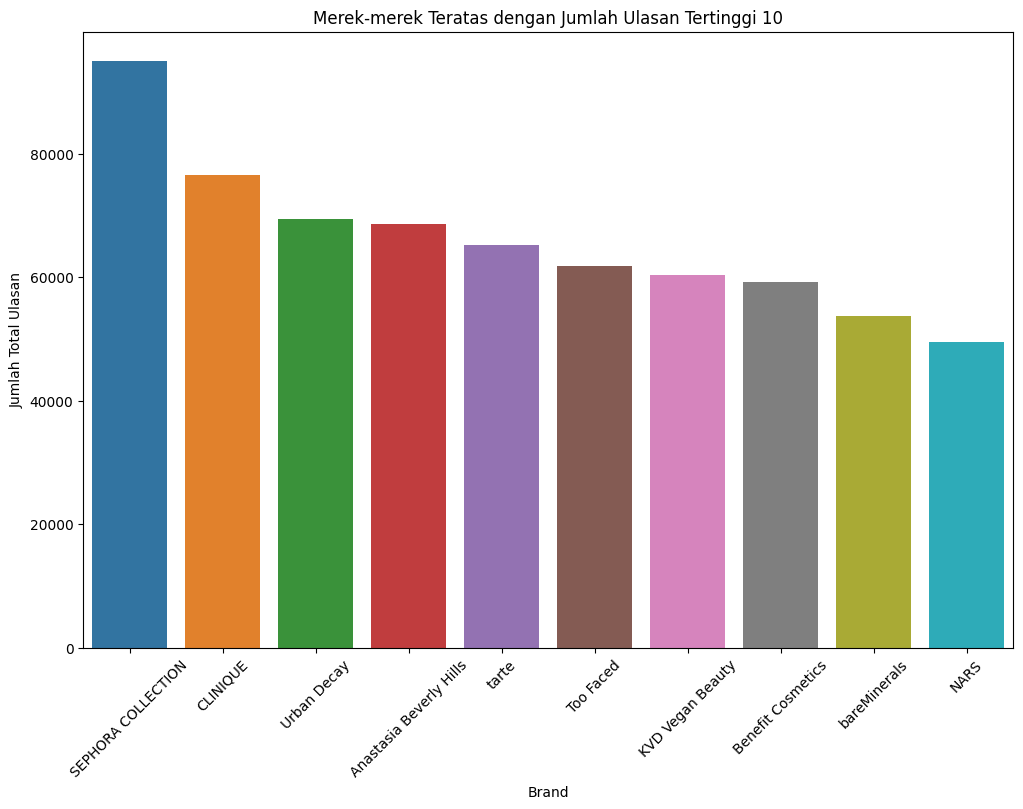

In [ ]:
# Mengelompokkan data berdasarkan merek dan menghitung total jumlah ulasan.
brand_reviews = train_data.groupby('brand')['number_of_reviews'].sum().sort_values(ascending=False)

# Pilih N merek teratas dengan jumlah ulasan total tertinggi.
top_n = 10
top_reviewed_brands = brand_reviews.head(top_n)

# Membuat sebuah diagram batang
plt.figure(figsize=(12, 8))
sns.barplot(x=top_reviewed_brands.index, y=top_reviewed_brands.values)
plt.title('Merek-merek Teratas dengan Jumlah Ulasan Tertinggi {}'.format(top_n))
plt.xlabel('Brand')
plt.ylabel('Jumlah Total Ulasan')
plt.xticks(rotation=45)
plt.show()

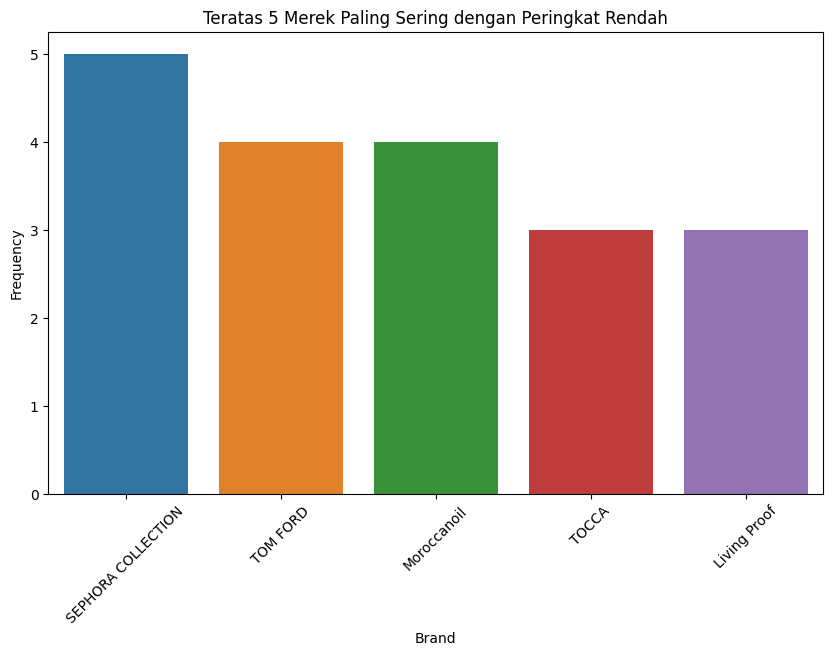

In [ ]:
# Filter data untuk menyertakan hanya merek dengan peringkat rendah
low_rated_brands = train_data[train_data['rating'] <= 2]

# Dapatkan 5 merek paling sering dengan peringkat rendah
top_n = 5
top_low_rated_brands = low_rated_brands['brand'].value_counts().head(top_n)

# Buat plot hitungan
plt.figure(figsize=(10, 6))
sns.countplot(x='brand', data=low_rated_brands, order=top_low_rated_brands.index)
plt.title('Teratas {} Merek Paling Sering dengan Peringkat Rendah'.format(top_n))
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

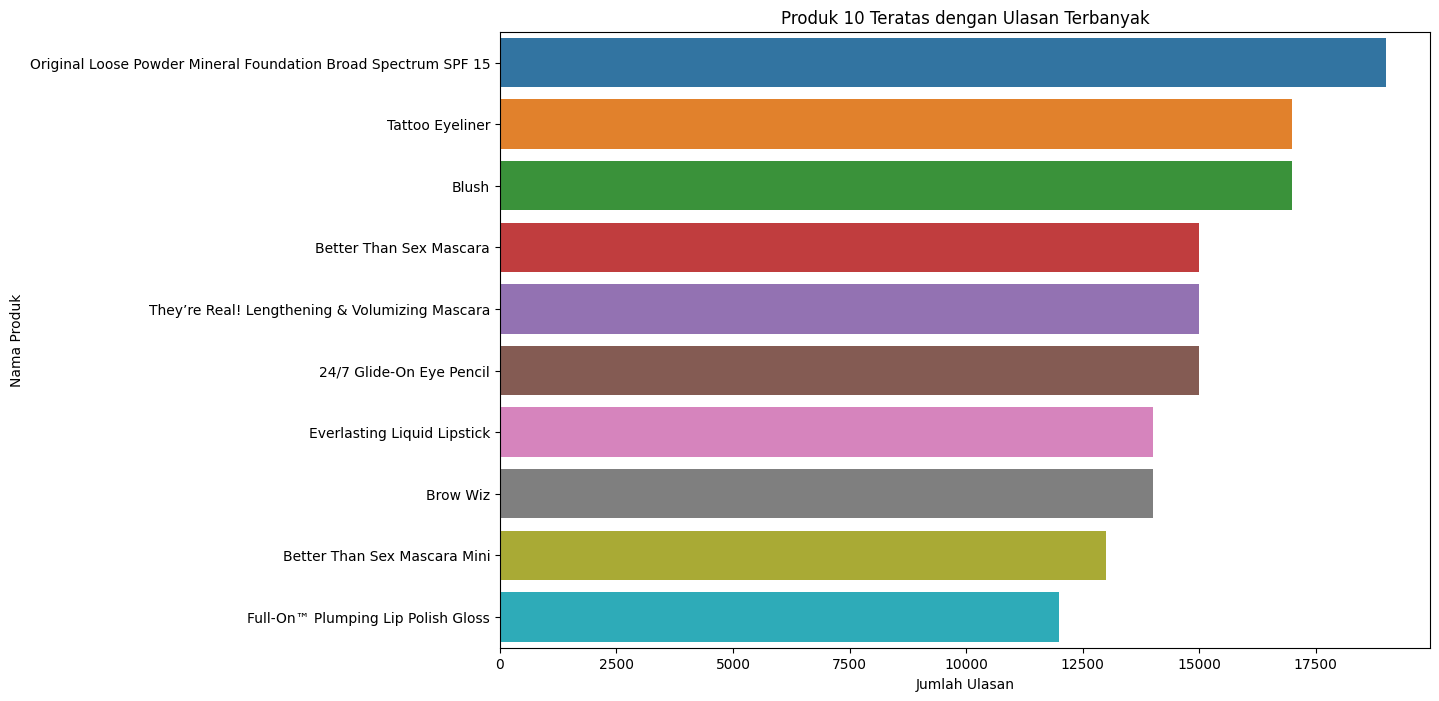

In [ ]:
# Urutkan data berdasarkan jumlah ulasan dalam urutan menurun
sorted_data = train_data.sort_values(by='number_of_reviews', ascending=False)

# Pilih 10 produk teratas dengan ulasan terbanyak
top_n = 10
top_reviewed_products = sorted_data.head(top_n)

# Buat plot batang atau plot pencar
plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_reviews', y='name', data=top_reviewed_products)
# or
# sns.scatterplot(x='number_of_reviews', y='name', data=top_reviewed_products, s=100)
plt.title('Produk {} Teratas dengan Ulasan Terbanyak'.format(top_n))
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Nama Produk')
plt.show()

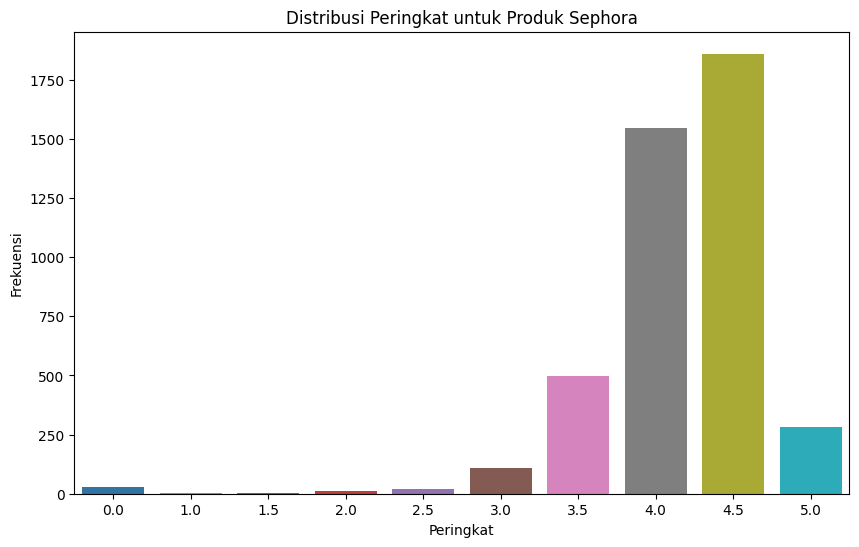

In [ ]:
# Buat plot hitungan untuk frekuensi peringkat
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=train_data)
plt.title('Distribusi Peringkat untuk Produk Sephora')
plt.xlabel('Peringkat')
plt.ylabel('Frekuensi')
plt.show()

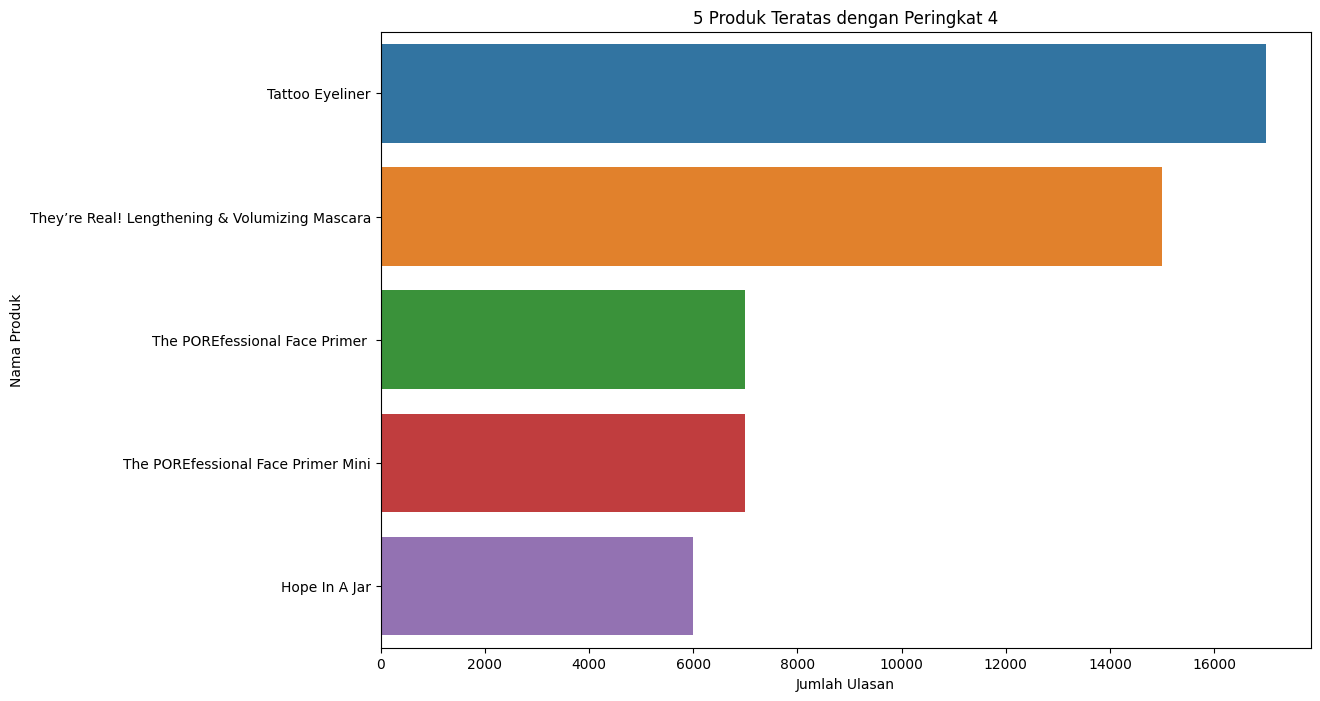

In [ ]:
# Filter data untuk menyertakan hanya produk dengan peringkat 4
rating_4_products = train_data[train_data['rating'] == 4].sort_values(by='number_of_reviews', ascending=False).head(5)

# Buat plot batang atau plot pencar
plt.figure(figsize=(12, 8))
sns.barplot(x='number_of_reviews', y='name', data=rating_4_products)
# or
# sns.scatterplot(x='number_of_reviews', y='name', data=rating_4_products, s=100)
plt.title('5 Produk Teratas dengan Peringkat 4')
plt.xlabel('Jumlah Ulasan')
plt.ylabel('Nama Produk')
plt.show()

# **Model Machine Learning**

In [ ]:
# Gabungkan train_data dan test_data untuk preprocessing
df = pd.concat([train_data, test_data], ignore_index=True)

In [ ]:
train_data['MarketingFlags'] = train_data.MarketingFlags.map({False:0, True:1})

In [ ]:
df = df.drop(['id'],axis=1)
df = df.drop(['name'],axis=1)
df = df.drop(['URL'],axis=1)
df = df.drop(['options'],axis=1)
df = df.drop(['details'],axis=1)
df = df.drop(['how_to_use'],axis=1)
df = df.drop(['ingredients'],axis=1)
df = df.drop(['price'],axis=1)

In [ ]:
 df['rating']=df['rating'].astype(str)

In [ ]:
# Dapatkan semua kolom kategorikal
cat_cols = df.select_dtypes("object").columns

## One-Hot Encoding semua variabel kategori tetapi menghilangkan salah satu fitur di antara mereka.
drop_categ = []
for i in cat_cols:
    drop_categ += [ i+'_'+str(df[i].unique()[-1]) ]

## Buat variabel dummy (Pengodean Satu Panas)
df = pd.get_dummies(df, columns=cat_cols)

## Jatuhkan kolom terakhir yang dihasilkan dari setiap fitur kategorikal
df.drop(drop_categ, axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
X = df.drop('value_price', axis = 1)
y = df['value_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print("Shape of the X Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the X test :", X_test.shape)
print("Shape of the y test :", y_test.shape)

Shape of the X Train : (4412, 1446)
Shape of the y Train : (4412,)
Shape of the X test : (1104, 1446)
Shape of the y test : (1104,)


In [ ]:
# Model Build
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,roc_curve, auc, precision_recall_curve, f1_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.impute import SimpleImputer
# Inisialisasi imputer untuk menangani nilai yang hilang
imputer = SimpleImputer(strategy='mean')

# Pasang imputer pada data pelatihan dan ubah data pelatihan dan pengujian
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [ ]:
# Inisialisasi dan latih Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_imputed, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Membuat prediksi pada data uji
y_pred = rf_model.predict(X_test_imputed)

In [ ]:
# Menghitung dan mencetak akurasi
print("Accuracy on Training set: ", rf_model.score(X_train_imputed, y_train))
print("Accuracy on Testing set: ", rf_model.score(X_test_imputed, y_test))

Accuracy on Training set:  0.949180567106794
Accuracy on Testing set:  0.6945390361481467


In [ ]:
import numpy as np

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error       : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error      :  13.045764945652174
Mean Squared Error       :  614.8572709624003
Root Mean Squared Error  :  24.7963156731479
R Squared Error          :  0.6945390361481467


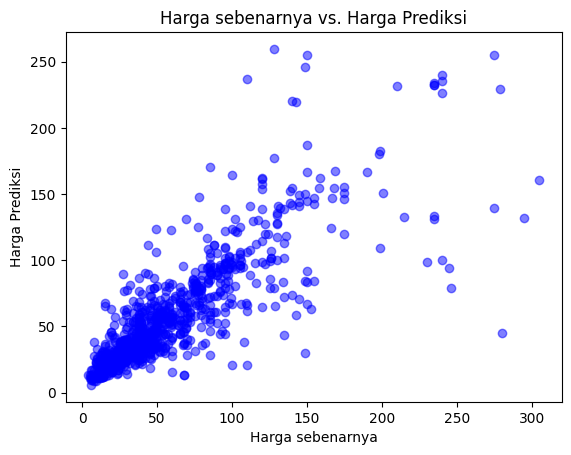

In [ ]:
# Visualisasikan prediksi vs. harga sebenarnya
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel("Harga sebenarnya")
plt.ylabel("Harga Prediksi")
plt.title("Harga sebenarnya vs. Harga Prediksi")
plt.show()